## Exploratory Data Analysis

En este notebook haremos un análisis de los datos empleados para analizar el fenómeno de la soledad no deseada que tanto ha empeorado en los últimos años a nivel mundial pero centrándonos en la provincia de Bizkaia. 

A raíz del comportamiento y evolución natural de la sociedad y la readaptación a las nuevas tecnologías y el mundo de las prisas y la urgencia, los rangos de edad que más se han visto afectados han sido aquellos que no han tenido ni tiempo ni oportunidad de entender las nuevas herramientas de las que disponemos a día de hoy para la comunicación instantánea o la digitalización de todos los sectores tradicionales que empleaban factor humano.

A través de un estudio exhaustivo del comportamiento de la soledad en las personas mayores de 65 años de edad a escala global, hemos puesto en marcha un modelo predictivo alimentado por numerosas características que influyen de forma directa en la tendencia que sufre un determinado individuo a la hora de acabar experimentando una situación de aislamiento involuntaria. Entre algunos de los atributos encontramos: las condiciones y accesibilidad del entorno, las condiciones de salud y *background* vital y por supuesto el contexto socioeconómico en el que se encuentra.

In [64]:
#importamos librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins

In [3]:
#leemos el dataset
sol = pd.read_csv('./df_soledad_DEF.csv')
sol.head()

,edad,estado_civil,sexo,nivel_estudios,psicofarmacos,vive_solo,hijos,ascensor,act_fisica,lim_fisica,estado_animo,satisfaccion_vida,ingresos_economicos,red_apoyo_familiar,cohesion_social,municipio_accesible,municipio_rec_social,municipio_rec_ocio,Nivel_soledad
0,2,1,3,4,2,3,0,2,0,2,0,0,4,2,0,3,1,0,1
1,4,2,3,2,1,3,2,0,1,2,1,2,0,2,1,1,0,3,1
2,1,4,1,2,1,1,0,2,0,2,1,2,0,4,1,3,0,1,1
3,0,4,3,0,2,1,2,0,0,4,3,2,2,0,0,1,1,1,1
4,4,1,1,0,1,3,2,2,4,2,3,4,2,4,1,1,1,0,2


In [4]:
#comprobamos nuestros datos y mostramos su tipo
sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   edad                  5001 non-null   int64
 1   estado_civil          5001 non-null   int64
 2   sexo                  5001 non-null   int64
 3   nivel_estudios        5001 non-null   int64
 4   psicofarmacos         5001 non-null   int64
 5   vive_solo             5001 non-null   int64
 6   hijos                 5001 non-null   int64
 7   ascensor              5001 non-null   int64
 8   act_fisica            5001 non-null   int64
 9   lim_fisica            5001 non-null   int64
 10  estado_animo          5001 non-null   int64
 11  satisfaccion_vida     5001 non-null   int64
 12  ingresos_economicos   5001 non-null   int64
 13  red_apoyo_familiar    5001 non-null   int64
 14  cohesion_social       5001 non-null   int64
 15  municipio_accesible   5001 non-null   int64
 16  munici

El dataset consta de 17 columnas de atributos, de tipo *integer*, con 5001 registros y un target que determina el nivel de soledad y se mueve entre valores 0 a 2. De forma que:

    ·Nivel soledad 0 = riesgo bajo de soledad no deseada
    ·Nivel soledad 1 = riesgo medio de soledad no deseada
    ·Nivel soledad 2 = riesgo alto de soledad no deseada

Para el resto de características hemos mapeado valores numéricos en función de la influencia que tienen sobre el target final.

In [5]:
#observamos los valores máximos y mínimos del mapeo
sol.describe()

,edad,estado_civil,sexo,nivel_estudios,psicofarmacos,vive_solo,hijos,ascensor,act_fisica,lim_fisica,estado_animo,satisfaccion_vida,ingresos_economicos,red_apoyo_familiar,cohesion_social,municipio_accesible,municipio_rec_social,municipio_rec_ocio,Nivel_soledad
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.0000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000,5001.000000,5001.000000,5001.000000,5001.000000
mean,1.992402,1.563687,2.030594,1.746051,1.340132,2.013797,1.013797,1.0002,2.041192,1.980004,1.322535,1.986403,1.962807,1.996801,0.49990,1.325535,1.342731,1.328334,1.167167
std,2.069575,1.336710,0.999632,1.472242,0.473801,1.000005,1.000005,1.0001,1.584646,1.647665,1.241511,1.623273,1.628071,1.628247,0.50005,1.250122,1.246801,1.250190,0.408472
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,2.000000,2.0000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.00000,1.000000,1.000000,1.000000,1.000000
75%,4.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.0000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,1.00000,3.000000,3.000000,3.000000,1.000000
max,6.000000,4.000000,3.000000,4.000000,2.000000,3.000000,2.000000,2.0000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,1.00000,3.000000,3.000000,3.000000,2.000000


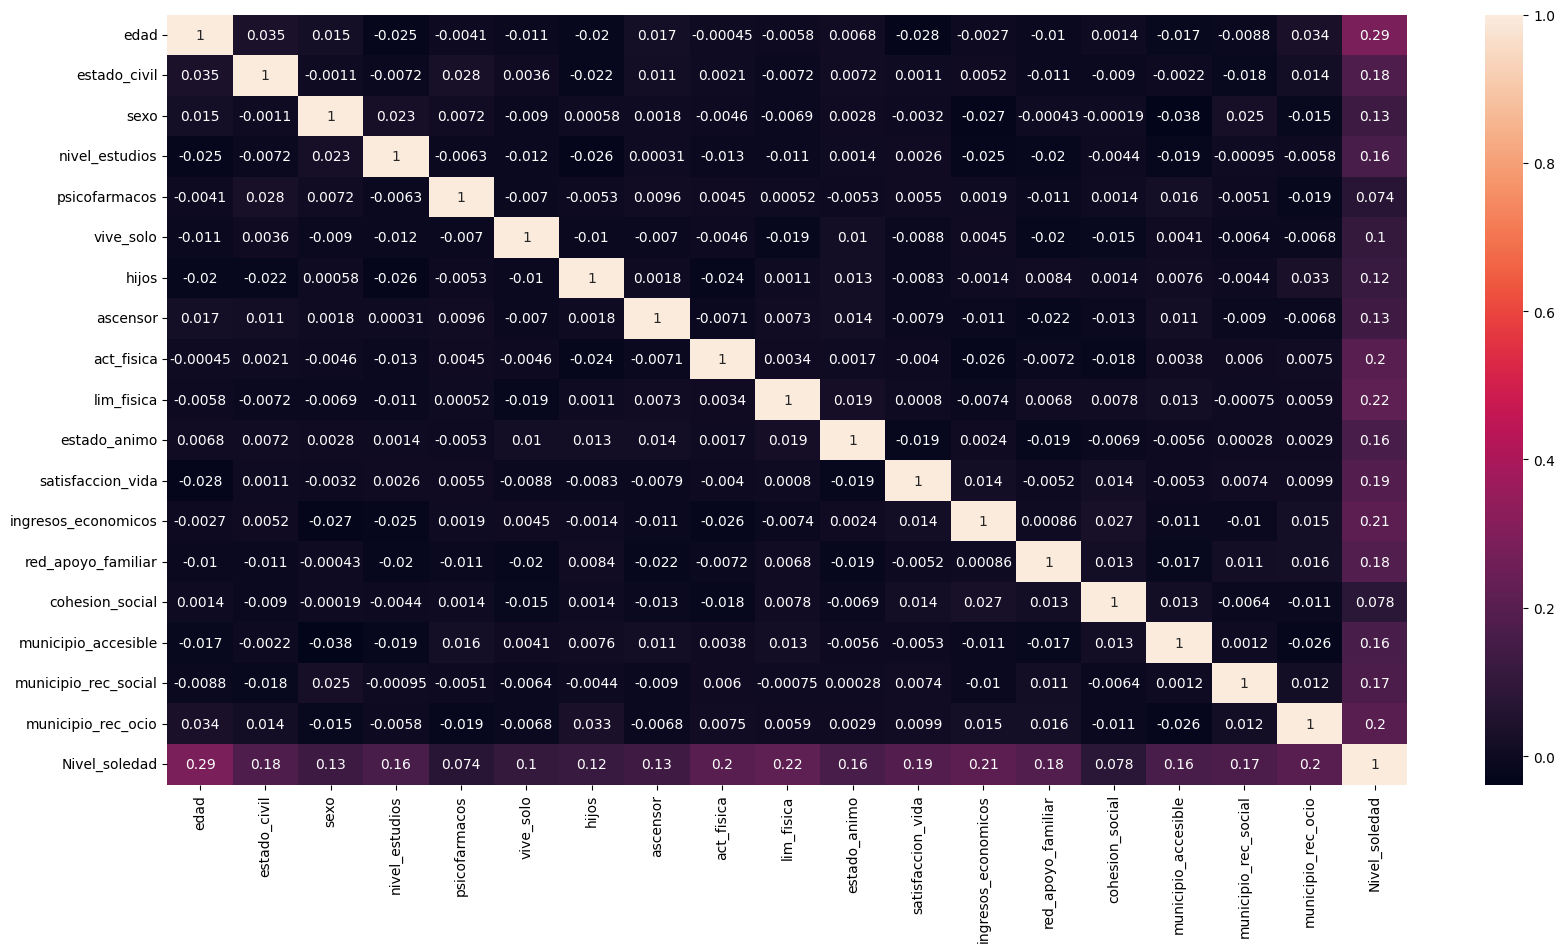

In [6]:
#sacamos una gráfica de correlación para ver cómo se relacionan los parámetros con el objetivo a predecir
plt.figure(figsize=(20,10))
sns.heatmap(sol.corr(), annot=True)
plt.savefig('corr_matrix');

En la matriz de correlación encontramos que las características que mejor afectan a nuestro objetivo son la **edad**, seguida de las **limitaciones físicas**, los **ingresos económicos** y la **actividad física**, entre otros. 

Los datos han sido procesados previamente y limpiados en estudios anteriores al desarrollo de este análisis de datos exploratorio. A continuación vemos cómo afectan de forma visual y cuánto pesa cada atributo en la identificación del *target*.

## Visualización

En este *notebook* crearemos las diferentes gráficas que vamos a utilizar en nuestro proyecto conjunto con las diferentes verticales, utilizando librerías de visualización interactivas para implementarlas en la página web de la **Diputación Foral de Bizkaia**. 


In [27]:
#importamos librerías
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Primera gráfica: evolución demográfica prevista (2022 - 2037)

In [28]:
#leemos el df
evo = pd.read_csv('./data/EVOLUCION DEMOGRAFICA 2022 - 2037.csv', encoding='latin1', sep='\t')
evo

,Sexo,Provincias,Edad,Periodo,Total
0,Total,Total Nacional,Todas las edades,2037,"51.669.140,414939"
1,Total,Total Nacional,Todas las edades,2036,"51.540.953,120023"
2,Total,Total Nacional,Todas las edades,2035,"51.397.897,851242"
3,Total,Total Nacional,Todas las edades,2034,"51.231.673,121938"
4,Total,Total Nacional,Todas las edades,2033,"51.038.408,437945"
...,...,...,...,...,...
7099,Mujeres,20 Gipuzkoa,100 y más años,2026,"327,593448"
7100,Mujeres,20 Gipuzkoa,100 y más años,2025,"291,351204"
7101,Mujeres,20 Gipuzkoa,100 y más años,2024,"238,694476"
7102,Mujeres,20 Gipuzkoa,100 y más años,2023,"210,104707"


En este dataframe encontramos la evolución demográfica prevista para los años 2022 y 2037. Vamos a reducir los datos al foco que nos interesa, la provincia de Bizkaia y la población mayor de 65 años. Con esto demostramos la urgencia de tratamiento de la temática impuesta por el incremento notorio de la demografía a nivel provincial.

In [ ]:
#buscamos la nomenclatura para referirse a bizkaia
evo['Provincias'].value_counts()

Total Nacional    1776
01 Araba/Álava    1776
48 Bizkaia        1776
20 Gipuzkoa       1776
Name: Provincias, dtype: int64

In [ ]:
#filtramos la información por provincia
evo = evo[evo['Provincias'] == '48 Bizkaia']

In [ ]:
evo['Edad'].values

array(['Todas las edades', 'Todas las edades', 'Todas las edades', ...,
       '100 y más años', '100 y más años', '100 y más años'], dtype=object)

In [ ]:
#quitamos los valores que nos meten ruido y no nos interesan
evo = evo[evo['Edad'] != 'Todas las edades']
evo = evo[evo['Sexo'] != 'Total']

In [ ]:
evo.info()
#compruebo mis datos. algunos numéricos están en objeto por lo que tengo que hacer conversiones (quitar comas) para poder representarlos gráficamente

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 3568 to 6511
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sexo        1152 non-null   object
 1   Provincias  1152 non-null   object
 2   Edad        1152 non-null   object
 3   Periodo     1152 non-null   int64 
 4   Total       1152 non-null   object
dtypes: int64(1), object(4)
memory usage: 54.0+ KB


In [ ]:
#sustituimos comas por puntos
evo['Total'] = [str(i).replace(",", ".") for i in evo['Total']]

In [ ]:
evo.to_excel('poblacion2022-2037.xlsx', index=False)

In [ ]:
evo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 3568 to 6511
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sexo        1152 non-null   object
 1   Provincias  1152 non-null   object
 2   Edad        1152 non-null   object
 3   Periodo     1152 non-null   int64 
 4   Total       1152 non-null   object
dtypes: int64(1), object(4)
memory usage: 54.0+ KB


In [ ]:
evo.head()

,Sexo,Provincias,Edad,Periodo,Total
3568,Hombres,48 Bizkaia,65 años,2037,8.376.767796
3569,Hombres,48 Bizkaia,65 años,2036,8.229.517387
3570,Hombres,48 Bizkaia,65 años,2035,8.197.066718
3571,Hombres,48 Bizkaia,65 años,2034,8.033.537423
3572,Hombres,48 Bizkaia,65 años,2033,8.264.078028
...,...,...,...,...,...
6507,Mujeres,48 Bizkaia,100 y más años,2026,586.625214
6508,Mujeres,48 Bizkaia,100 y más años,2025,504.435468
6509,Mujeres,48 Bizkaia,100 y más años,2024,420.726903
6510,Mujeres,48 Bizkaia,100 y más años,2023,362.527482


In [ ]:
evo.dtypes
#comprobamos los tipos de la columna, necesario convertir a int o float aquellas que contienen datos numéricos

Sexo          object
Provincias    object
Edad          object
Periodo        int64
Total         object
dtype: object

In [ ]:
def eliminar_puntos_y_convertir(valor):
    valor_sin_puntos = valor.replace('.', '')
    return float(valor_sin_puntos)

evo['Total'] = evo['Total'].apply(eliminar_puntos_y_convertir)

#función para convertir y convertimos

In [ ]:
evo['Total'] = [float(str(i).replace(",", ".")) for i in evo['Total']]

In [ ]:
#comprobamos
evo.dtypes

Sexo           object
Provincias     object
Edad           object
Periodo         int64
Total         float64
dtype: object

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.

C:\Users\lcasa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



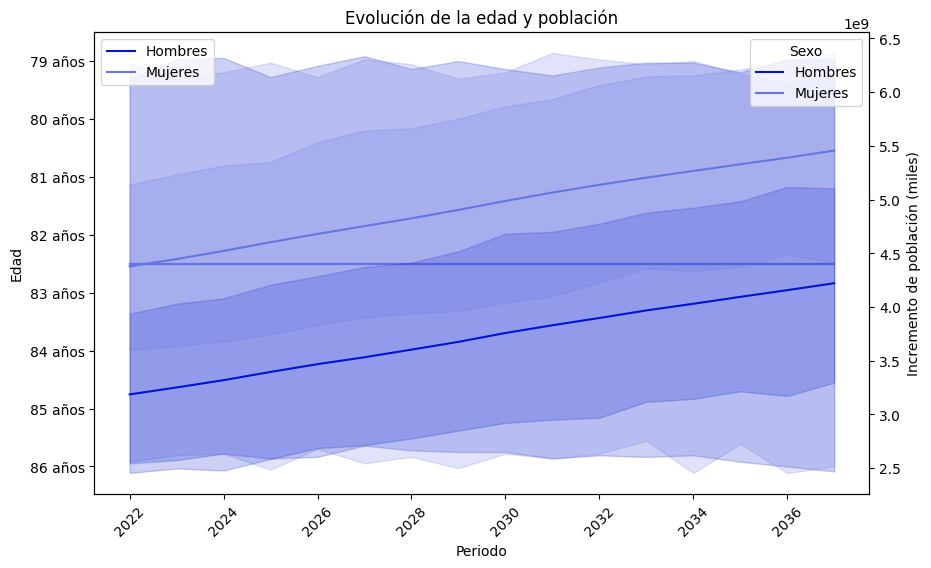

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

#paleta colores corporativos
color_palette = ['#0014D1', '#6773E4', '#F5CD3D', '#B3B7E5', '#067F8D']

#establecemos ejes con sus respectivas columnas a las que hacen referencia
sns.lineplot(data=evo, x='Periodo', y='Edad', hue='Sexo', palette=color_palette, ax=ax)

ax2 = ax.twinx()
ax2.set_ylabel('Incremento de población (miles)')

#gráfica
sns.lineplot(data=evo, x='Periodo', y='Total', hue='Sexo', palette=color_palette, ax=ax2)

#títulos y leyendas
ax.set_title('Evolución de la edad y población')
ax.set_ylabel('Edad')
ax.legend(loc='upper left')

#visualización ejes x e y
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Periodo')

plt.show();

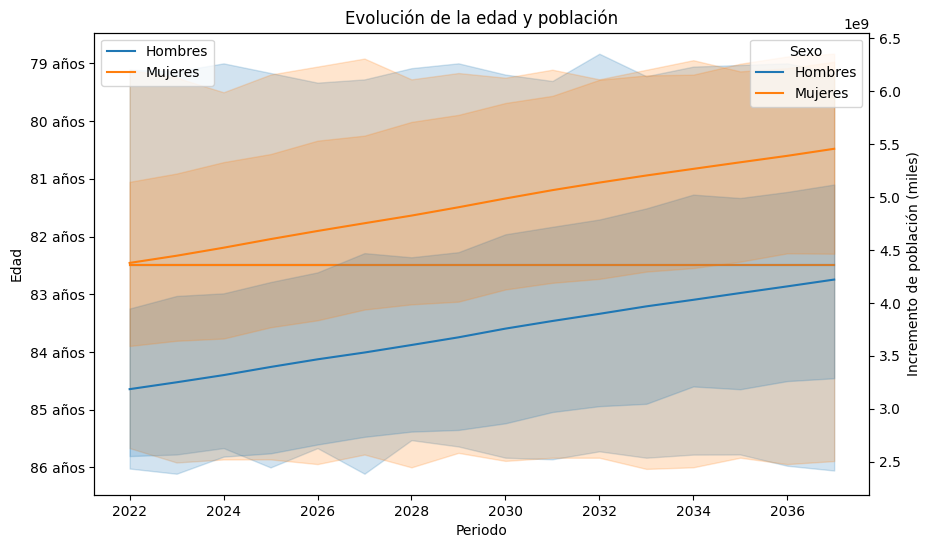

<Figure size 640x480 with 0 Axes>

In [ ]:
#creamos figura, tamaño y ejes
fig, ax = plt.subplots(figsize=(10, 6))

#color
color_palette = ['#0014D1', '#6773E4', '#F5CD3D','#B3B7E5', '#067F8D']

sns.lineplot(data=evo, x='Periodo', y='Edad', hue='Sexo', color=color_palette, ax=ax)

#configuramos el eje y para la población
ax2 = ax.twinx()
ax2.set_ylabel('Incremento de población (miles)')


#graficamos el incremento de población para hombres y mujeres
sns.lineplot(data=evo, x='Periodo', y='Total', hue='Sexo', color=color_palette, ax=ax2)

#títulos y leyendas
ax.set_title('Evolución de la edad y población')
ax.set_ylabel('Edad')
ax.legend(loc='upper left')

plt.show();
plt.savefig('poblacion2022-2037')

Segunda Gráfica: Sedentarismo por CCAA

In [29]:
sed_1 = pd.read_csv('./data/SEDENTARISMO POR CCAA.csv', encoding='latin1', sep = ';')

In [30]:
sed_1.head()

,Sexo,Total Nacional,Comunidades y Ciudades Autónomas,Sí o no,Total
0,Ambos sexos,Total,Andalucía,Sí,"40,06"
1,Ambos sexos,Total,Andalucía,No,"59,94"
2,Ambos sexos,Total,Aragón,Sí,"30,28"
3,Ambos sexos,Total,Aragón,No,"69,72"
4,Ambos sexos,Total,Asturias (Principado de),Sí,"20,87"


In [ ]:
#filtramos
sed_1 = sed_1[sed_1['Comunidades y Ciudades Autónomas'] == 'País Vasco']

In [ ]:
sed_1

,Sexo,Total Nacional,Comunidades y Ciudades Autónomas,Sí o no,Total
30,Ambos sexos,Total,País Vasco,Sí,"28,43"
31,Ambos sexos,Total,País Vasco,No,"71,57"


In [ ]:
sed_1['Sí o no'].dtype
#la cifra está en string, la paso a float

dtype('O')

In [ ]:
#sustituimos comas por puntos
sed_1['Total'] = [float(str(i).replace(",", ".")) for i in sed_1['Total']]
sed_1['Total'].dtype

dtype('float64')

In [ ]:
sed_1['Total'] = sed_1['Total'].astype('category')

In [ ]:
fig = px.histogram(sed_1, x="Total", color="Sí o no", color_discrete_map={"Sí": '#0014D1', "No": "#6773E4"}, 
                   hover_data=['Total'])
fig.update_layout(
    xaxis_title="Sí | No",
    yaxis_title="Conteo en porcentaje"
)
fig.update_layout(title='Grado de dificultad en la movilidad según edad')

fig.update_layout(
    font_family="Calibri",
    font_color="#067F8D",
    title_font_family="Calibri",
    title_font_color="black",
    legend_title_font_color="black"
)
fig.update_xaxes(title_font_family="Calibri")

fig.show()

fig.write_html("./grafica_dificultad.html")

Tercera gráfica: Sedentarismo en la población por edades

In [31]:
sed_2 = pd.read_csv('./data/SEDENTARISMO.csv', encoding='latin1', skiprows=1)
#leo mis datos

In [ ]:
sed_2.head()

,sexo,edad,actividad,2007
0,Hombres,16-24,Sedentario,39.3
1,Hombres,16-24,Moderado,24.2
2,Hombres,16-24,Activo,19.4
3,Hombres,16-24,Muy activo,17.0
4,Hombres,25-44,Sedentario,52.5


In [ ]:
sed_2.info()
#compruebo el tipo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sexo       32 non-null     object 
 1   edad       32 non-null     object 
 2   actividad  32 non-null     object 
 3   2007       32 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.1+ KB


In [ ]:
sed_2.to_excel('sedentarismo.xlsx')

In [ ]:
import plotly.graph_objects as go

#hacemos una figura para cada grupo, hombres y mujeres

fig = go.Figure()
fig.add_trace(go.Bar(
    x=sed_2['actividad'],
    y=sed_2['2007'][sed_2['sexo'] == 'Hombres'],
    name='Hombres',
    marker_color='#B3B7E5'
))
fig.add_trace(go.Bar(
    x=sed_2['actividad'],
    y=sed_2['2007'][sed_2['sexo'] == 'Mujeres'],
    name='Mujeres',
    marker_color='#067F8D'
))

fig.update_layout(barmode='group', xaxis_title="Sedentarismo en la población de Bizkaia por grupo de edad",
    yaxis_title="Conteo en porcentaje")
fig.update_layout(
    font_family="Calibri",
    font_color="#067F8D",
    title_font_family="Calibri",
    title_font_color="black",
    legend_title_font_color="black"
)
fig.update_xaxes(title_font_family="Calibri")

fig.update_layout(title='Sedentarismo en Bizkaia por grupo de edad')

fig.write_html("./grafica_sedentarismo.html")
fig.show()

Cuarta gráfica: referencia a la dificultad en la movilidad según sexo y grupo de edad

In [32]:
mov = pd.read_csv('./data/Dificultad en la movilidad según sexo y grupo de edad.csv', encoding='latin1', sep=';')
mov.head()

,Sexo,Edad,Grado de dificultad,Total
0,Ambos sexos,TOTAL,TOTAL,"100,00"
1,Ambos sexos,TOTAL,Sin dificultad,"86,12"
2,Ambos sexos,TOTAL,Con alguna dificultad,"7,92"
3,Ambos sexos,TOTAL,Con mucha dificultad,"4,09"
4,Ambos sexos,TOTAL,No puede hacerlo,"1,87"


In [ ]:
mov.Edad.value_counts()

TOTAL               15
De 15 a 24 años     15
De 25 a 34 años     15
De 35 a 44 años     15
De 45 a 54 años     15
De 55 a 64 años     15
De 65 a 74 años     15
De 75 a 84 años     15
De 85 y más años    15
Name: Edad, dtype: int64

In [ ]:
#quitamos los datos de edades más tempranas
mov = mov[(mov['Edad'] == 'De 55 a 64 años') | (mov['Edad'] == 'De 65 a 74 años') | (mov['Edad'] == 'De 75 a 84 años') |
    (mov['Edad'] == 'De 85 y más años')]

In [ ]:
mov.info()
#comprobamos los datos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 25 to 134
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sexo                 60 non-null     object
 1   Edad                 60 non-null     object
 2   Grado de dificultad  60 non-null     object
 3   Total                60 non-null     object
dtypes: object(4)
memory usage: 2.3+ KB


In [ ]:
mov.head()

,Sexo,Edad,Grado de dificultad,Total
25,Ambos sexos,De 55 a 64 años,TOTAL,"100,00"
26,Ambos sexos,De 55 a 64 años,Sin dificultad,"85,59"
27,Ambos sexos,De 55 a 64 años,Con alguna dificultad,"9,16"
28,Ambos sexos,De 55 a 64 años,Con mucha dificultad,"4,06"
29,Ambos sexos,De 55 a 64 años,No puede hacerlo,"1,19"


In [ ]:
mov['Sexo'].value_counts()

Ambos sexos    20
Hombres        20
Mujeres        20
Name: Sexo, dtype: int64

In [ ]:
mov = mov[mov['Grado de dificultad'] != 'TOTAL']

In [ ]:
mov = mov[mov['Sexo'] == 'Ambos sexos']

In [ ]:
mov = mov[mov['Edad'] != 'TOTAL']

In [ ]:
mov.head()

,Sexo,Edad,Grado de dificultad,Total
26,Ambos sexos,De 55 a 64 años,Sin dificultad,"85,59"
27,Ambos sexos,De 55 a 64 años,Con alguna dificultad,"9,16"
28,Ambos sexos,De 55 a 64 años,Con mucha dificultad,"4,06"
29,Ambos sexos,De 55 a 64 años,No puede hacerlo,"1,19"
31,Ambos sexos,De 65 a 74 años,Sin dificultad,"75,86"


In [ ]:
#convertimos a float la columna de total, sustituyendo comas por puntos

mov['Total'] = [float(str(i).replace(",", ".")) for i in mov['Total']]
mov['Total'].dtype

dtype('float64')

In [ ]:
mov.to_excel('movilidad.xlsx')

In [ ]:
#paleta 
colors = ['#0014D1', '#6773E4', '#F5CD3D','#B3B7E5', '#067F8D']

#creamos gráfica
fig = px.bar(mov, x='Edad', y='Total', color='Grado de dificultad', barmode='group', color_discrete_sequence=colors)

#títulos 
fig.update_xaxes(title_text='Rangos de edad')
fig.update_yaxes(title_text='Total dificultad en porcentaje')
fig.update_layout(title='Grado de dificultad en la movilidad según edad')
fig.update_layout(
    font_family="Calibri",
    font_color="#067F8D",
    title_font_family="Calibri",
    title_font_color="black",
    legend_title_font_color="black"
)
fig.update_xaxes(title_font_family="Calibri")
fig.show()

fig.write_html("./grafica_movilidad.html")

Quinta gráfica: 

In [33]:
limit = pd.read_csv('./data/LIMITACIONES FÍSICAS POR EDAD Y SEXO.csv', encoding='latin1', sep = ';')
limit.head()

,Sexo,Edad,Limitación,Total
0,Hombres,De 15 a 24 años,Gravemente limitado/a,"1,06"
1,Hombres,De 15 a 24 años,Limitado/a pero no gravemente,"5,39"
2,Hombres,De 15 a 24 años,Nada limitado/a,"93,55"
3,Hombres,De 25 a 34 años,Gravemente limitado/a,"0,68"
4,Hombres,De 25 a 34 años,Limitado/a pero no gravemente,"6,42"


In [ ]:
limit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sexo        48 non-null     object
 1   Edad        48 non-null     object
 2   Limitación  48 non-null     object
 3   Total       48 non-null     object
dtypes: object(4)
memory usage: 1.6+ KB


In [ ]:
limit['Total'] = [float(str(i).replace(",", ".")) for i in limit['Total']]
limit['Total'].dtype

dtype('float64')

In [ ]:
limit.head(2)

,Sexo,Edad,Limitación,Total
0,Hombres,De 15 a 24 años,Gravemente limitado/a,1.06
1,Hombres,De 15 a 24 años,Limitado/a pero no gravemente,5.39


In [ ]:
fig = px.area(limit, x="Limitación", y="Total", color="Sexo", line_group="Sexo")
fig.update_layout(
    font_family="Calibri",
    font_color="blue",
    title_font_family="Calibri",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.show()

Sexta gráfica: mapa cercano para el dashboard

263.000 personas viven solas en la C.A. de Euskadi y el 43% tiene más de 64 años.


Casi 28.000 personas viven solas con 85 y más años de edad y la mayor parte (81,2%) son mujeres

In [34]:
coor = pd.read_csv('./data/coord_2.csv', sep= ',')

In [35]:
coor.head()

,ciudad,latitud,longitud,2022,value
0,Arakaldo,43.1914,-2.8703,22,0
1,Ubide,43.0866,-2.6107,27,1
2,Gizaburuaga,43.3244,-2.5367,29,2
3,Garai,43.1005,-2.7359,54,3
4,Izurtza,43.1507,-2.6157,55,4


In [ ]:
coor.to_excel('coordenadas.xlsx')

In [ ]:
#color
color_palette = ['#0014D1', '#6773E4', '#F5CD3D','#B3B7E5', '#067F8D']

#fig
fig = px.scatter_mapbox(coor, lat=" latitud", lon=" longitud", color="value", size="value",
                  color_continuous_scale=color_palette, size_max=25, zoom=9,
                  mapbox_style="carto-positron")

fig.update_layout(
    font_family="Calibri",
    font_color="blue",
    title_font_family="Calibri",
    title_font_color="red",
    legend_title_font_color="green"
)

fig.show()

fig.write_html("./mapa_dashboard_white.html")

Séptima gráfica: número de horas semanales dedicadas al cuidado de personas mayores o personas con dolencias crónicas

In [41]:
ded = pd.read_csv('./data/Número de horas semanales dedicadas al cuidado de personas mayores o personas con dolencias crónicas.csv',
            encoding='latin1', sep=';')

In [42]:
ded.head()

,Sexo,Edad,Horas dedicación,Total
0,Ambos sexos,De 15 a 24 años,Menos de 10 horas a la semana,"69,6"
1,Ambos sexos,De 15 a 24 años,10 horas a la semana pero menos de 20,"22,5"
2,Ambos sexos,De 15 a 24 años,20 horas a la semana o más,"38,6"
3,Ambos sexos,De 25 a 44 años,Menos de 10 horas a la semana,"405,0"
4,Ambos sexos,De 25 a 44 años,10 horas a la semana pero menos de 20,"172,8"


In [43]:
ded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sexo              12 non-null     object
 1   Edad              12 non-null     object
 2   Horas dedicación  12 non-null     object
 3   Total             12 non-null     object
dtypes: object(4)
memory usage: 512.0+ bytes


In [44]:
ded['Total'].unique()
#compruebo mis valores porque son pocos, no me permite cambiar a float el que refleja miles, lo ataco por separado

array(['69,6', '22,5', '38,6', '405,0', '172,8', '345,9', '853,7',
       '515,2', '1.033,8', '158,2', '86,7', '494,5'], dtype=object)

In [45]:
#accedo por índice
ded.loc[8,['Total']] = ['1033,8']

In [46]:
#compruebo
ded['Total'][8]

'1033,8'

In [47]:
#convierto mi columna de total a float, cambiando las comas por puntos
ded['Total'] = [float(str(i).replace(",", ".")) for i in ded['Total']]

In [48]:
ded.head()

,Sexo,Edad,Horas dedicación,Total
0,Ambos sexos,De 15 a 24 años,Menos de 10 horas a la semana,69.6
1,Ambos sexos,De 15 a 24 años,10 horas a la semana pero menos de 20,22.5
2,Ambos sexos,De 15 a 24 años,20 horas a la semana o más,38.6
3,Ambos sexos,De 25 a 44 años,Menos de 10 horas a la semana,405.0
4,Ambos sexos,De 25 a 44 años,10 horas a la semana pero menos de 20,172.8


In [49]:
ded.Edad.value_counts()

De 15 a 24 años     3
De 25 a 44 años     3
De 45 a 64 años     3
De 65 y más años    3
Name: Edad, dtype: int64

In [50]:
ded = ded.drop(columns = ['Sexo'])

In [51]:
ded['Edad'].value_counts()

De 15 a 24 años     3
De 25 a 44 años     3
De 45 a 64 años     3
De 65 y más años    3
Name: Edad, dtype: int64

In [52]:
ded = ded[ded['Edad'] == 'De 65 y más años']

In [53]:
ded['Horas dedicación'].value_counts()

Menos de 10 horas a la semana            1
10 horas a la semana pero menos de 20    1
20 horas a la semana o más               1
Name: Horas dedicación, dtype: int64

In [54]:
ded.to_excel('dedicación_personas_mayores.xlsx')

In [55]:
import matplotlib.pyplot as plt

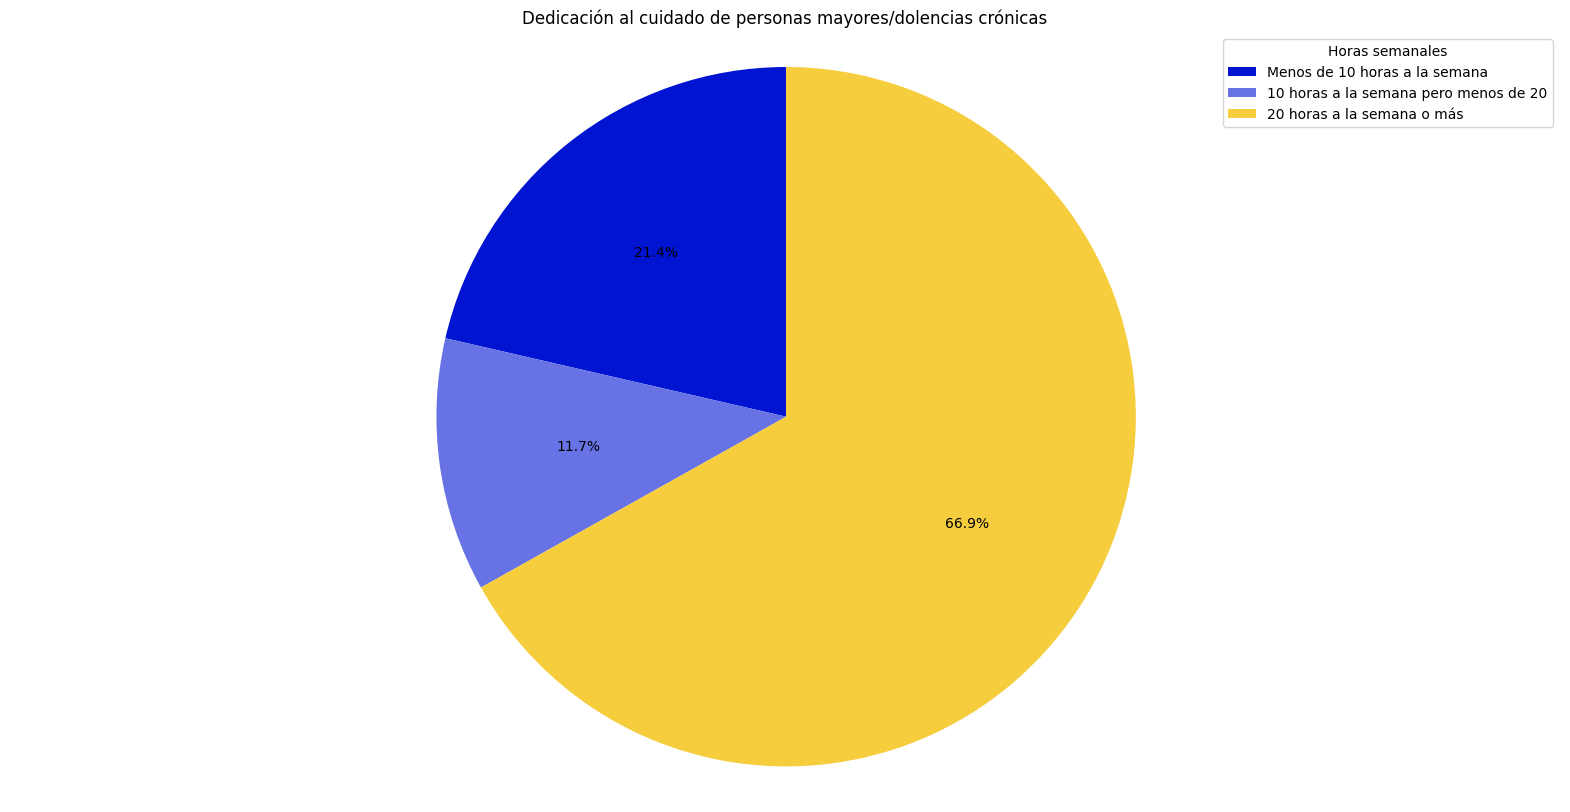

<Figure size 640x480 with 0 Axes>

In [56]:
# Crear el gráfico de pie
fig, ax = plt.subplots(figsize=(20,10))
colors = ['#0014D1', '#6773E4', '#F5CD3D', '#B3B7E5', '#067F8D']
pie = ax.pie(ded['Total'], autopct='%1.1f%%', colors=colors, startangle=90)

# Agregar leyenda para los rangos de edad
legend_labels = ded['Horas dedicación']
ax.legend(pie[0], legend_labels, title='Horas semanales', 
loc='upper right')

#título
ax.set_title('Dedicación al cuidado de personas mayores/dolencias crónicas')

plt.axis('equal')#asegurar que sea un círculo perfecto
plt.show();
plt.savefig('horas_dedicacion_personas_mayores.png')

Octava gráfica: pesos importantes en relación con el target

In [57]:
corr_matr = pd.read_csv('./data/relacion_parametros.csv')

In [58]:
corr_matr.head()

,Variable 1,Variable 2,r,abs_r
0,Nivel_soledad,edad,0.285877,0.285877
1,edad,Nivel_soledad,0.285877,0.285877
2,Nivel_soledad,lim_fisica,0.217144,0.217144
3,lim_fisica,Nivel_soledad,0.217144,0.217144
4,ingresos_economicos,Nivel_soledad,0.210848,0.210848


In [59]:
corr_matr = corr_matr.drop(columns=['abs_r'])

In [60]:
corr_matr = corr_matr[corr_matr['Variable 1'] == 'Nivel_soledad']

In [61]:
corr_matr

,Variable 1,Variable 2,r
0,Nivel_soledad,edad,0.285877
2,Nivel_soledad,lim_fisica,0.217144
5,Nivel_soledad,ingresos_economicos,0.210848
7,Nivel_soledad,municipio_rec_ocio,0.204247
9,Nivel_soledad,act_fisica,0.200395


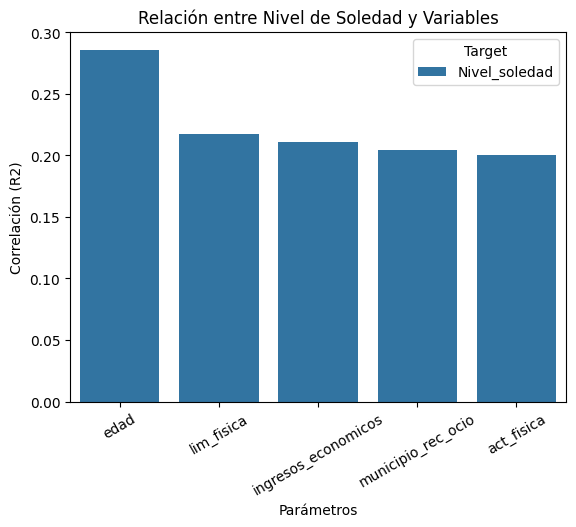

In [62]:
sns.barplot(data=corr_matr, x='Variable 2', y='r', hue='Variable 1')
plt.xlabel('Parámetros')
plt.ylabel('Correlación (R2)')
plt.xticks(rotation=30)
plt.title('Relación entre Nivel de Soledad y Variables')
plt.legend(title='Target')
plt.show();

In [63]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(x=corr_matr['Variable 2'], y=corr_matr['r'])],
    layout_title_text="Relación entre Nivel de Soledad y Variables"
    
)

fig.update_layout(
    xaxis_title="Parámetros",
    yaxis_title="Correlación (R2)",
    font_family="Calibri",
    font_color="#067F8D",
    title_font_family="Calibri",
    title_font_color="black",
    legend_title_font_color="black"
)



fig.update_xaxes(title_font_family="Calibri")
fig.write_html("./corr_modelo.html")
fig.show()

Novena y última gráfica: mapa de calor representativo a gran escala de la soledad en mayores en la provincia vizcaína

Para esta gráfica hemos empleado la librería de mapas *folium*, creando una vista satélite interactiva de los municipios en los que se concentra la mayor cantidad de población sola a partir de los 65 años de edad. 
Se han seleccionado 51 municipios de los 113 que conforman el territorio histórico

In [96]:
#mapa vacío con las coordenadas que necesito
map = folium.Map(location=[43.2500000,-2.9166700], tiles="openstreetmap", zoom_start=10)

#mostrar mapa
map

In [97]:
#leo mi archivo de coordenadas por municipio y lo muestro
municipios = pd.read_csv('./data/municipioscoor.csv', sep = ';')
municipios.head()

,ciudad,latitud,longitud
0,Bilbao,43.2630,-2.9350
1,Mallabia,43.2389,-2.5152
2,Guernica,43.3125,-2.6783
3,Lanestosa,43.2067,-3.3341
4,Bermeo,43.4208,-2.7226


In [98]:
municipios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ciudad     51 non-null     object 
 1    latitud   51 non-null     float64
 2    longitud  51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [99]:
#leo el csv de la población de mayores por municipio en bizkaia, para saber cómo ordenar mis burbujas
personas = pd.read_csv('./data/datos_flolium.csv', encoding = 'latin1', skiprows= 2)
personas.head()

,ámbitos territoriales,grandes grupos de edad cumplida,sexo,2022
0,Abadiño,>= 65,Total,1640
1,Abanto y Ciérvana-Abanto Zierbena,>= 65,Total,1883
2,Ajangiz,>= 65,Total,117
3,Alonsotegi,>= 65,Total,656
4,Amorebieta-Etxano,>= 65,Total,3943


In [100]:
#quito las columnas que no me interesan y dejo territorio y población
personas.drop(columns=['grandes grupos de edad cumplida', 'sexo'], inplace=True)

In [101]:
personas = personas.sort_values(by= ['2022'])
personas.head()

,ámbitos territoriales,2022
6,Arakaldo,22
99,Ubide,27
51,Gizaburuaga,29
46,Garai,54
59,Izurtza,55


In [102]:
#renombro la columna para poder hacer un merge con mi anterior df
personas.rename(columns={'ámbitos territoriales' : 'ciudad'}, inplace=True)

In [103]:
#uno ambos df para poder hacer label encoder para el tamaño de las burbujas
merged = pd.merge(municipios, personas, on="ciudad")
merged = merged.sort_values(by=['2022'])
merged.head()

,ciudad,latitud,longitud,2022
16,Arakaldo,43.1914,-2.8703,22
5,Ubide,43.0866,-2.6107,27
29,Gizaburuaga,43.3244,-2.5367,29
26,Garai,43.1005,-2.7359,54
23,Izurtza,43.1507,-2.6157,55


In [104]:
#uso label encoder para asignar etiquetas de tamaño a cada municipio
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(merged['2022'])
encoded = le.transform(merged['2022'])
print(encoded)

[ 0  1  2  3  4  5  6  7  8  8  9 10 11 12 13 13 14 14 15 16 17 18 19 19
 20 21 22 23 24 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [105]:
print(type(encoded))

<class 'numpy.ndarray'>


In [106]:
#añado la columna de value para asignar el tamaño de las burbujas
merged['value'] = encoded.tolist()

In [107]:
merged.head()

,ciudad,latitud,longitud,2022,value
16,Arakaldo,43.1914,-2.8703,22,0
5,Ubide,43.0866,-2.6107,27,1
29,Gizaburuaga,43.3244,-2.5367,29,2
26,Garai,43.1005,-2.7359,54,3
23,Izurtza,43.1507,-2.6157,55,4


In [108]:
merged.to_csv('./coord_2.csv', index=False)

In [109]:
#bucle mapa sin cambio de color
for i in range(0,len(merged)):
   folium.Circle(
      location=[merged.iloc[i][' latitud'], merged.iloc[i][' longitud']],
      tooltip='{}: {}'.format(merged.iloc[i]['ciudad'], merged.iloc[i]['2022']),
      radius=float(merged.iloc[i]['value'])*80,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(map)

In [110]:
map

In [91]:
map.save('heatmap_v1.html')